In [1]:
import pandas as pd
koi = pd.read_csv('KOI.csv', skiprows=144)   
koi

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10090151,K07985.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,-1.757,0.068,2.763,0.074,2.344,0.072,-1.756,0.068,2.929,0.072
9560,9561,10128825,K07986.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.497,0,...,-0.250,0.490,0.780,0.460,0.500,0.400,-0.180,0.470,0.530,0.470
9561,9562,10147276,K07987.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.021,0,...,-3.650,0.260,5.000,0.220,3.380,0.160,-3.890,0.260,5.160,0.220
9562,9563,10155286,K07988.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.092,0,...,1.320,0.670,1.690,0.530,1.450,0.110,1.370,0.660,2.000,0.460


In [2]:
import pandas as pd

# Read the CSV with metadata lines skipped if necessary (replace skiprows value appropriately)
df = pd.read_csv('KOI.csv', skiprows=144)

# Target column (for classification)
target_col = 'koi_disposition'

# List of important feature columns (update this list as needed)
important_cols = [
    'koi_period',
    'koi_duration',
    'koi_depth',
    'koi_prad',
    'koi_sma',
    'koi_impact',
    'koi_ror',
    'koi_steff',
    'koi_srad',
    'koi_smass',
    'koi_slogg',
    'koi_smet',
    'koi_teq',
    'koi_model_snr',
    'koi_num_transits',
    'koi_fpflag_nt',
    'koi_fpflag_ss',
    'koi_fpflag_co',
    'koi_fpflag_ec'
]

# Build the list of required columns (target + important features)
selected_cols = [target_col] + important_cols

# Select only these columns and drop the rest
df_selected = df[selected_cols]

# Preview the cleaned dataframe
print(df_selected.head())


  koi_disposition  koi_period  koi_duration  koi_depth  koi_prad  koi_sma  \
0       CONFIRMED    9.488036       2.95750      615.8      2.26   0.0853   
1       CONFIRMED   54.418383       4.50700      874.8      2.83   0.2734   
2       CANDIDATE   19.899140       1.78220    10829.0     14.60   0.1419   
3  FALSE POSITIVE    1.736952       2.40641     8079.2     33.46   0.0267   
4       CONFIRMED    2.525592       1.65450      603.3      2.75   0.0374   

   koi_impact   koi_ror  koi_steff  koi_srad  koi_smass  koi_slogg  koi_smet  \
0       0.146  0.022344     5455.0     0.927      0.919      4.467      0.14   
1       0.586  0.027954     5455.0     0.927      0.919      4.467      0.14   
2       0.969  0.154046     5853.0     0.868      0.961      4.544     -0.18   
3       1.276  0.387394     5805.0     0.791      0.836      4.564     -0.52   
4       0.701  0.024064     6031.0     1.046      1.095      4.438      0.07   

   koi_teq  koi_model_snr  koi_num_transits  koi_fpflag_

In [3]:
# Assume df_selected is your cleaned DataFrame from previous step

# Extract target column for model training
y = df_selected['koi_disposition']

# Extract feature columns for model input
X = df_selected.drop(columns=['koi_disposition'])


In [4]:
# Check value counts and unique values in target
print("Target class counts:")
print(y.value_counts())

# Check for missing values in feature columns
print("\nMissing values per feature:")
print(X.isnull().sum())

# Check basic statistics of each feature for outlier and distribution analysis
print("\nFeature statistics:")
print(X.describe())


Target class counts:
koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64

Missing values per feature:
koi_period             0
koi_duration           0
koi_depth            363
koi_prad             363
koi_sma              363
koi_impact           363
koi_ror              363
koi_steff            363
koi_srad             363
koi_smass            363
koi_slogg            363
koi_smet             386
koi_teq              363
koi_model_snr        363
koi_num_transits    1142
koi_fpflag_nt          0
koi_fpflag_ss          0
koi_fpflag_co          0
koi_fpflag_ec          0
dtype: int64

Feature statistics:
          koi_period  koi_duration     koi_depth       koi_prad      koi_sma  \
count    9564.000000   9564.000000  9.201000e+03    9201.000000  9201.000000   
mean       75.671358      5.621606  2.379134e+04     102.891778     0.223989   
std      1334.744046      6.471554  8.224268e+04    3077.639126     0.566359   
min       

In [5]:
# Direct features (no missing values)
direct_cols = [
    'koi_period', 'koi_duration',
    'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec'
]
X_direct = X[direct_cols]

# Features needing handling (imputation or removal)
missing_cols = [
    'koi_depth', 'koi_prad', 'koi_sma', 'koi_impact', 'koi_ror', 'koi_steff',
    'koi_srad', 'koi_smass', 'koi_slogg', 'koi_smet', 'koi_teq',
    'koi_model_snr', 'koi_num_transits'
]
X_missing = X[missing_cols]

# Impute missing values with median (if you want to fill, not drop)
X_missing_imputed = X_missing.fillna(X_missing.median())

# Combine for model training
X_final = pd.concat([X_direct, X_missing_imputed], axis=1)


In [6]:
X_final.isnull().sum() 

koi_period          0
koi_duration        0
koi_fpflag_nt       0
koi_fpflag_ss       0
koi_fpflag_co       0
koi_fpflag_ec       0
koi_depth           0
koi_prad            0
koi_sma             0
koi_impact          0
koi_ror             0
koi_steff           0
koi_srad            0
koi_smass           0
koi_slogg           0
koi_smet            0
koi_teq             0
koi_model_snr       0
koi_num_transits    0
dtype: int64

In [7]:
# These columns are fully populated and ready for use
selected_cols = [
    'koi_period', 'koi_duration',
    'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
    'koi_depth', 'koi_prad', 'koi_sma', 'koi_impact', 'koi_ror', 'koi_steff',
    'koi_srad', 'koi_smass', 'koi_slogg', 'koi_smet', 'koi_teq',
    'koi_model_snr', 'koi_num_transits'
]
X_ready = X[selected_cols]  # Your feature matrix

y_ready = y  # Your target (e.g., 'koi_disposition')



In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_ready)


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_ready)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [13]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)


c:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:18:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9221118661787768
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       396
           1       0.89      0.88      0.89       549
           2       0.99      0.99      0.99       968

    accuracy                           0.92      1913
   macro avg       0.90      0.90      0.90      1913
weighted avg       0.92      0.92      0.92      1913



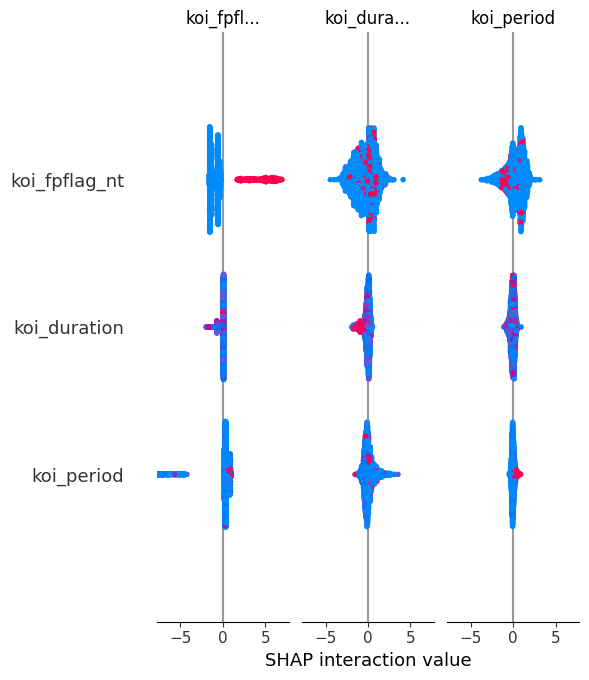

In [18]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=selected_cols)
